In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
import pickle
import glob
import itertools
import pandas as pd
# from utils.plot_util import *
import socket
import os

## Loading files

In [2]:
hostname = socket.gethostname()
if hostname == 'HAITI' or 'Gorleben':
    DIR = "C:/Users/xin/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "D:/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'BALI':
    DIR = "/home/xin/projects/trelleborg"
    DATASET = "/storage/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'LAPTOP-1FOJITEG':
    DIR = "C:/Users/xinch/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "C:/LINHC/VersucheDBs/Trelleborg/V27/*.h5"
DIR = os.path.abspath(DIR)
DATASET = os.path.abspath(DATASET)

file_list = []
for file in glob.glob(DATASET):
    file_list.append(file)
file_list = sorted(file_list)
file_list_LEM1 = [file for file in file_list if 'LEM1' in file]
file_list_LEM2 = [file for file in file_list if 'LEM2' in file]
file_list_LEM2

['D:\\xin\\datasets\\Trelleborg\\V27\\V27-100bar_LEM2.h5',
 'D:\\xin\\datasets\\Trelleborg\\V27\\V27-200bar_LEM2.h5',
 'D:\\xin\\datasets\\Trelleborg\\V27\\V27-30bar_LEM2.h5']

In [3]:
def load_and_plot(num):
    file = file_list_LEM2[num]
    filename = file.split(os.sep)[-1][:-3]
    h51 = h5py.File(file, "r")
    print("file:",filename)
    print("\nATTR:")
    print(h51.attrs.keys())
    print("\nKeys:")
    print(h51.keys())
    
    %matplotlib inline
    plt.figure(figsize=(10,8))
    plt.plot(h51['spd1'],label='speed (negative)')
    plt.plot(h51['ip1k1'],label='intermidiate seal pressure')
    plt.plot(h51['k1t'],label='temperature')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

file: V27-100bar_LEM2

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM2', 'S21_P1_LEM2', 'S21_P2_LEM2', 'S22_LEM2', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


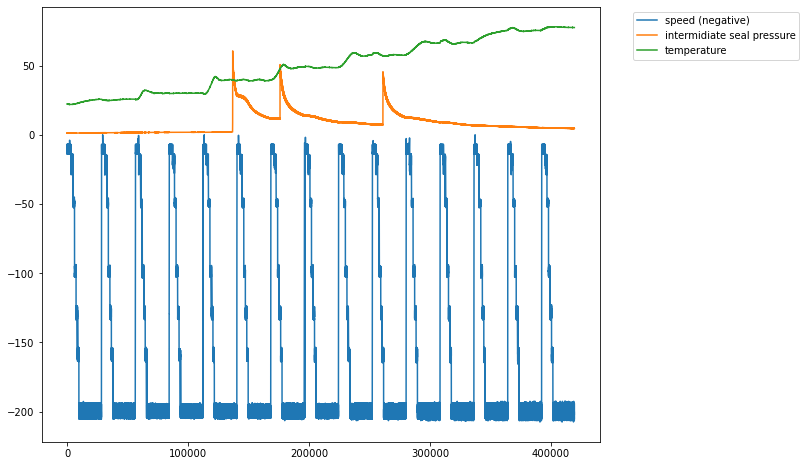

In [4]:
load_and_plot(0)

file: V27-200bar_LEM2

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM2', 'S21_P1_LEM2', 'S21_P2_LEM2', 'S22_LEM2', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


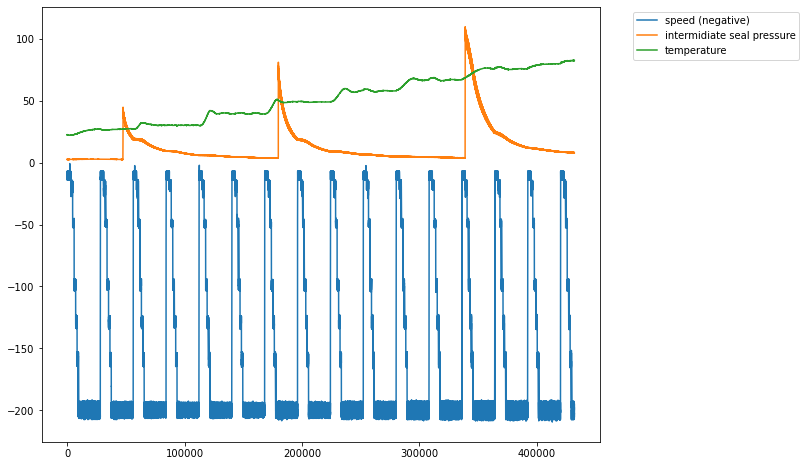

In [5]:
load_and_plot(1)

file: V27-30bar_LEM2

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM2', 'S21_P1_LEM2', 'S21_P2_LEM2', 'S22_LEM2', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


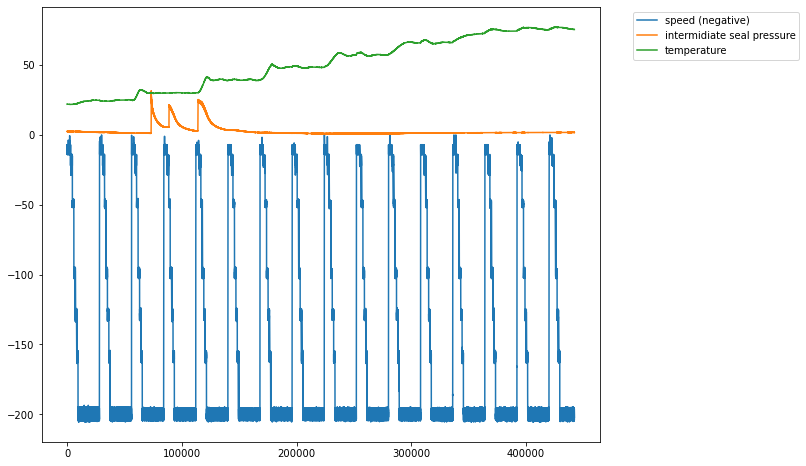

In [6]:
load_and_plot(2)

In [7]:
file = file_list_LEM2[1] # 200 bar as an example
filename = file.split(os.sep)[-1][:-3]
print(filename)
# pklName = DIR + '/data/V27/shift_opts_freqs_all/' + filename + '.pkl'
# shift_opts_freqs_all = pickle.load(open(pklName, 'rb')) 
# print(shift_opts_freqs_all.shape)
h51 = h5py.File(file, "r")
json.loads(h51.attrs["name_lookup"])

V27-200bar_LEM2


{'Ist-Ablauf-Zeit, ca.': 't',
 'Ist-MG1: Teller-Drehfrequenz [Hz]': 'tdf',
 'Soll-MG1: Teller-Drehfrequenz [Hz]': 'stdf',
 'Ist-MG2: Kammer1-Temp[°C]': 'k1t',
 'Soll-MG2: Kammer1-Temp[°C]': 'sk1t',
 'Ist-MG3: Kammer1-Druck[bar]': 'k1p',
 'Soll-MG3: Kammer1-Druck[bar]': 'sk1p',
 'Ist-MG4: Kammer2-Temp.[°C]': 'k2t',
 'Soll-MG4: Kammer2-Temp.[°C]': 'sk2t',
 'Ist-MG5: Kammer2-Druck[bar]': 'k2p',
 'Soll-MG5: Kammer2-Druck[bar]': 'sk2p',
 'Ist-MG6: Kammer1-Kraft[kN]': 'k1f',
 'Soll-MG6: Kammer1-Kraft[kN]': 'sk1f',
 'Ist-MG7: Kammer2-Kraft[kN]': 'k2f',
 'Soll-MG7: Kammer2-Kraft[kN]': 'sk2f',
 'Ist-MG8: Kammer1-Außentemp.[°C]': 'k1at',
 'Soll-MG8: Kammer1-Außentemp.[°C]': 'sk1at',
 'Ist-MG9: Kammer2-Außentemp.[°C]': 'k2at',
 'Soll-MG9: Kammer2-Außentemp.[°C]': 'sk2at',
 'Ist-MG10: Kammer1-Istpos.[mm]': 'pos1',
 'Soll-MG10: Kammer1-Istpos.[mm]': 'spos1',
 'Ist-MG11: Kammer2-Istpos.[mm]': 'pos2',
 'Soll-MG11: Kammer2-Istpos.[mm]': 'spos2',
 'Ist-MG12: Hub1[mm]': 'hub1',
 'Soll-MG12: Hub1[mm]': '

## Check


see s21 diff with same pos, spd but different temp and pressure

### Datasets

In [8]:
file_list_LEM2

['D:\\xin\\datasets\\Trelleborg\\V27\\V27-100bar_LEM2.h5',
 'D:\\xin\\datasets\\Trelleborg\\V27\\V27-200bar_LEM2.h5',
 'D:\\xin\\datasets\\Trelleborg\\V27\\V27-30bar_LEM2.h5']

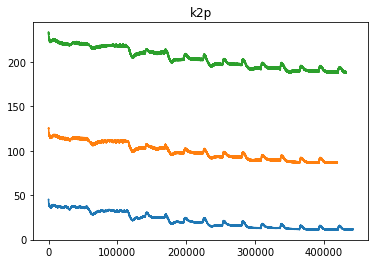

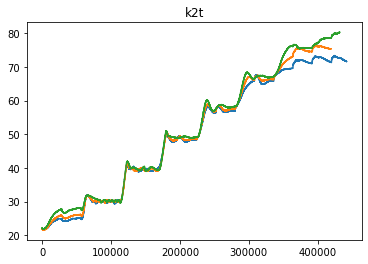

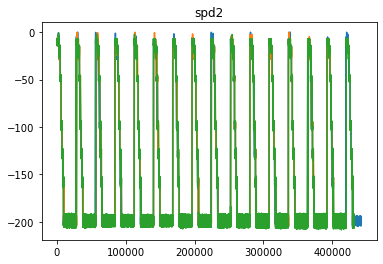

In [9]:
h5_30 = h5py.File(file_list_LEM2[2], "r")
h5_100 = h5py.File(file_list_LEM2[0], "r")
h5_200 = h5py.File(file_list_LEM2[1], "r")

def plot3(h51,h52,h53,key):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(key)
    ax.plot(h51[key])
    ax.plot(h52[key])
    ax.plot(h53[key])
plot3(h5_30,h5_100,h5_200,'k2p')
plot3(h5_30,h5_100,h5_200,'k2t')
plot3(h5_30,h5_100,h5_200,'spd2')

compare B-E and C-F due to similar temperature level

### Extract positions

In [10]:
#  compare the data points 1.5e6~3e6 
F = int(1.5*1e5)
L = int(3*1e5)

# extract data
spd_30 = h5_30['spd2'][F:L]
spd_100 = h5_100['spd2'][F:L]
spd_200 = h5_200['spd2'][F:L]
pos_30 = h5_30['pos2'][F:L]
pos_100 = h5_100['pos2'][F:L]
pos_200 = h5_200['pos2'][F:L]

pos_200.shape

(150000,)

#### Speed analysis

In [11]:
dict_speed = {
    "mean":[
        abs(np.mean(spd_30[1000:2000])),
        abs(np.mean(spd_30[8000:9000]))
    ],
    
    "std":[
        np.std(spd_30[1000:2000]),
        np.std(spd_30[8000:9000]),
    ],

}

pd.DataFrame.from_dict(dict_speed, orient='index',
                       columns=['Speed of points [1000:2000]', 'Speed of points [8000:9000]',])

,Speed of points [1000:2000],Speed of points [8000:9000]
mean,199.498305,199.535166
std,1.905553,1.895512


In [12]:
# define starting point as the first point of the first lsa
f_30 = np.where(spd_30>-20)[0][0]
f_100 = np.where(spd_100>-20)[0][0]
f_200 = np.where(spd_200>-20)[0][0]

In [13]:
# test N points starting from f_30, f_100 or f_200
N = 10000
pos_30 = pos_30[f_30:f_30+N]
pos_100 = pos_100[f_100:f_100+N]
pos_200 = pos_200[f_200:f_200+N]
spd_30 = spd_30[f_30:f_30+N]
spd_100 = spd_100[f_100:f_100+N]
spd_200 = spd_200[f_200:f_200+N]

pos_30.shape

(10000,)

### Rough shift for position

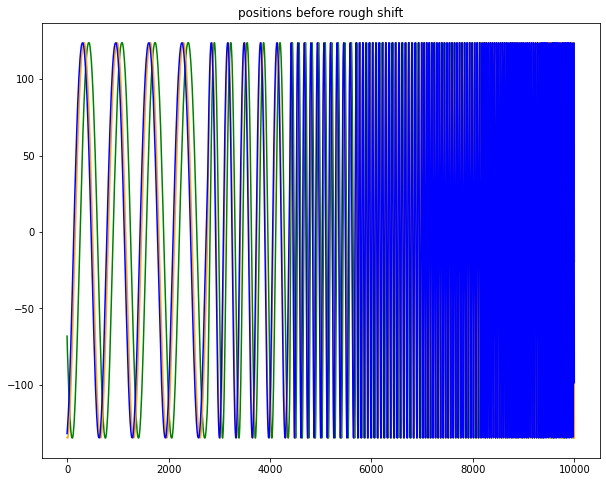

In [14]:
# compare the positions before rough shift
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('positions before rough shift')
ax.plot(pos_30,'green')
ax.plot(pos_100,'orange')
ax.plot(pos_200,'blue')

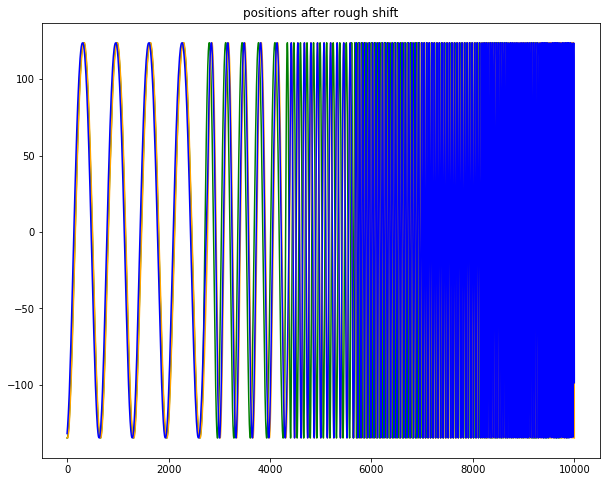

In [15]:
# compare the positions after shift
shift_p = 100

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('positions after rough shift')
ax.plot(pos_30[shift_p:],'green')
ax.plot(pos_100,'orange')
ax.plot(pos_200,'blue')

In [16]:
# redefine pos_30 accordingly
pos_30 = h5_30['pos2'][F:L][f_30+shift_p:f_30+N+shift_p]

### Accurate shift for position

In [17]:
shifts_30_200=[]
for first in range(0,10000,1000):
    last = first + 1000
    s1 = pos_30[first:last]
    s2 = pos_200[first:last]
    shift_opt = 0
    dist_opt = np.linalg.norm(s1-s2)
    for shift in range(1,100):# TODO
        dist = np.linalg.norm(s1[shift:]-s2[:-shift])
        dist_inv = np.linalg.norm(s1[:-shift]-s2[shift:])
        if dist<dist_opt:
            shift_opt = shift
            dist_opt = dist
        if dist_inv < dist_opt:
            shift_opt = -shift
            dist_opt = dist_inv
    shift_opt
    shifts_30_200.append(shift_opt)
shifts_30_200

[23, 23, -12, -40, -75, -86, -90, 56, -95, -96]

In [18]:
shifts_100_200=[]
for first in range(0,10000,1000):
    last = first + 1000
    s1 = pos_100[first:last]
    s2 = pos_200[first:last]
    shift_opt = 0
    dist_opt = np.linalg.norm(s1-s2)
    for shift in range(1,100):# TODO
        dist = np.linalg.norm(s1[shift:]-s2[:-shift])
        dist_inv = np.linalg.norm(s1[:-shift]-s2[shift:])
        if dist<dist_opt:
            shift_opt = shift
            dist_opt = dist
        if dist_inv < dist_opt:
            shift_opt = -shift
            dist_opt = dist_inv
    shifts_100_200.append(shift_opt)
shifts_100_200

[29, 29, 20, 12, 3, -1, -2, 47, -3, -4]

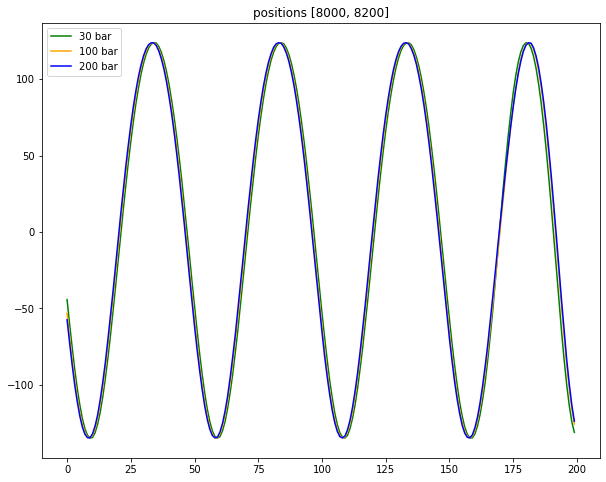

In [19]:
# check for position alignment after accurate shift
i = 8
points = 200
first = i*1000
last = first+points

manual_30 = 1 # TODO
shift_30_ = shifts_30_200[i]+manual_30
shift_100_ = shifts_100_200[i]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title(f'positions [{first}, {last}]')
ax.plot(pos_30[first+shift_30_:last+shift_30_],'green',label='30 bar')
ax.plot(pos_100[first+shift_100_:last+shift_100_],'orange',label='100 bar')
ax.plot(pos_200[first:last],'blue',label='200 bar')
ax.legend()

### Extract s21 data based on previous analysis

In [20]:
# extract s21 in 10 intervals, considering the starting point (f_30), the rough shift (shift_p) and the accurate shift for each interval (shifts_30_200)

s21_30 = []
s21_100 = []
s21_200 = []

freq = 20 # choose a specific frequency for simplicity

for i in range(10):
    first = F + 1000*i
    last = first + 1000
    _s21_30 = np.array(h5_30['S21_P1_LEM2'][first+f_30+shift_p+shifts_30_200[i]:last+f_30+shift_p+shifts_30_200[i],:])
    _s21_100 = np.array(h5_100['S21_P1_LEM2'][first+f_100+shifts_100_200[i]:last+f_100+shifts_100_200[i],:])
    _s21_200 = np.array(h5_200['S21_P1_LEM2'][first+f_200:last+f_200,:])
    s21_30.append(_s21_30)
    s21_100.append(_s21_100)
    s21_200.append(_s21_200)
s21_30 = np.vstack(s21_30)
s21_100 = np.vstack(s21_100)
s21_200 = np.vstack(s21_200)
s21_200.shape

(10000, 121)

### Accurate shift for s21

#### method 1: alignment based on mse and grid search

In [21]:
shifts1=[]
for first in range(0,10000,1000):
    last = first + 1000
    s1 = []
    for v in s21_30[first:last,freq]:
        s1.append(v.real)
        s1.append(v.imag)
    s1 = np.array(s1)
    
    s2 = []
    for v in s21_200[first:last,freq]:
        s2.append(v.real)
        s2.append(v.imag)
    s2 = np.array(s2)
    
    shift_opt = 0
    dist_opt = np.linalg.norm(s1-s2)
    for shift in range(1,100):# TODO
        dist = np.linalg.norm(s1[shift:]-s2[:-shift])
        dist_inv = np.linalg.norm(s1[:-shift]-s2[shift:])
        if dist<dist_opt:
            shift_opt = shift
            dist_opt = dist
        if dist_inv < dist_opt:
            shift_opt = -shift
            dist_opt = dist_inv
    shift_opt
    shifts1.append(shift_opt)
shifts1

[-24, -24, 44, -26, -30, -8, -26, 74, 56, -26]

In [22]:
shifts2=[]
for first in range(0,10000,1000):
    last = first + 1000
    s1 = []
    for v in s21_100[first:last,freq]:
        s1.append(v.real)
        s1.append(v.imag)
    s1 = np.array(s1)
    
    s2 = []
    for v in s21_200[first:last,freq]:
        s2.append(v.real)
        s2.append(v.imag)
    s2 = np.array(s2)
    
    shift_opt = 0
    dist_opt = np.linalg.norm(s1-s2)
    for shift in range(1,100):# TODO
        dist = np.linalg.norm(s1[shift:]-s2[:-shift])
        dist_inv = np.linalg.norm(s1[:-shift]-s2[shift:])
        if dist<dist_opt:
            shift_opt = shift
            dist_opt = dist
        if dist_inv < dist_opt:
            shift_opt = -shift
            dist_opt = dist_inv
    shift_opt
    shifts2.append(shift_opt)
shifts2

[-10, -10, 6, -10, -12, -10, -10, 90, -10, -8]

In [23]:
# redefine s21, considering the starting point (f_30), the rough shift (shift_p) and the accurate shift for each interval (shifts_30_200)
                            #, and the results of mse alignment above
s21_30_shifted = []
s21_100_shifted = []
s21_200_shifted = []

freq = 20 # choose a specific frequency for simplicity

for i in range(10):
    first = F + 1000*i
    last = first + 1000
    _s21_30 = np.array(h5_30['S21_P1_LEM2'][first+f_30+shift_p+shifts_30_200[i]+shifts1[i]:last+f_30+shift_p+shifts_30_200[i]+shifts1[i],:])
    _s21_100 = np.array(h5_100['S21_P1_LEM2'][first+f_100+shifts_100_200[i]+shifts2[i]:last+f_100+shifts_100_200[i]+shifts2[i],:])
    _s21_200 = np.array(h5_200['S21_P1_LEM2'][first+f_200:last+f_200,:])
    s21_30_shifted.append(_s21_30)
    s21_100_shifted.append(_s21_100)
    s21_200_shifted.append(_s21_200)
s21_30_shifted = np.vstack(s21_30_shifted)
s21_100_shifted = np.vstack(s21_100_shifted)
s21_200_shifted = np.vstack(s21_200_shifted)
s21_200.shape

(10000, 121)

#### Method 2: alignment based on first min value

In [24]:
shifts1_=[]
shifts2_=[]
for first in range(0,10000,1000):
    last = first+1000

    min_200 = min(abs(s21_200_shifted[first:last,20]).argsort()[-100:][::-1])
    min_30 = min(abs(s21_30_shifted[first:last,20]).argsort()[-100:][::-1])
    min_100 = min(abs(s21_100_shifted[first:last,20]).argsort()[-100:][::-1])

    shift1_ = min_30 - min_200
    shift2_ = min_100 - min_200
    shifts1_.append(shift1_)
    shifts2_.append(shift2_)

In [25]:
shifts1_

[12, 9, -21, 13, 52, 4, -32, 13, 16, -26]

In [26]:
shifts2_

[5, 4, -2, 5, 16, 8, -40, 5, 4, -8]

In [27]:
# redefine s21, considering the starting point (f_30), the rough shift (shift_p) and the accurate shift for each interval (shifts_30_200)
                            #, and the results of mse alignment above
                            #, and the results of min value alignment above
s21_30_shifted = []
s21_100_shifted = []
s21_200_shifted = []

freq = 20 # choose a specific frequency for simplicity

for i in range(10):
    first = F + 1000*i
    last = first + 1000
    _s21_30 = np.array(h5_30['S21_P1_LEM2'][first+f_30+shift_p+shifts_30_200[i]+shifts1[i]+shifts1_[i]:last+f_30+shift_p+shifts_30_200[i]+shifts1[i]+shifts1_[i],:])
    _s21_100 = np.array(h5_100['S21_P1_LEM2'][first+f_100+shifts_100_200[i]+shifts2[i]+shifts2_[i]:last+f_100+shifts_100_200[i]+shifts2[i]+shifts2_[i],:])
    _s21_200 = np.array(h5_200['S21_P1_LEM2'][first+f_200:last+f_200,:])
    s21_30_shifted.append(_s21_30)
    s21_100_shifted.append(_s21_100)
    s21_200_shifted.append(_s21_200)
s21_30_shifted = np.vstack(s21_30_shifted)
s21_100_shifted = np.vstack(s21_100_shifted)
s21_200_shifted = np.vstack(s21_200_shifted)
s21_200_shifted.shape

(10000, 121)

In [28]:
def plot_compare_s21(s21_30,s21_100,s21_200,shifts1,shifts2,shifts1_,shifts2_,interval,points = 1000,manual1=0,manual2=0):
    first = interval * 1000
    last = first + points
    shift1 = shifts1[interval]+shifts1_[interval]+manual1
    shift2 = shifts2[interval]+shifts2_[interval]+manual2
    
    fig = plt.figure(figsize=(12,6))
    plt.suptitle('before shift')
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('s21 of frequency'+str(freq))
    ax1.plot(abs(s21_30[first:last,freq]),'green',label='30 bar') # time shift needed
    ax1.plot(abs(s21_200[first:last,freq]),'blue', label = '200 bar')
    ax1.legend()
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title('s21 of frequency'+str(freq))
    ax2.plot(abs(s21_100[first:last,freq]),'orange',label='100 bar') # time shift needed
    ax2.plot(abs(s21_200[first:last,freq]),'blue',label='200 bar')
    ax2.legend()
    
    fig = plt.figure(figsize=(12,6))
    plt.suptitle('after shift')
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('s21 of frequency'+str(freq))
    ax1.plot(abs(s21_30[first+shift1:last+shift1,freq]),'green',label='30 bar') # time shift needed
    ax1.plot(abs(s21_200[first:last,freq]),'blue', label = '200 bar')
    ax1.legend()
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title('s21 of frequency'+str(freq))
    ax2.plot(abs(s21_100[first+shift2:last+shift2,freq]),'orange',label='100 bar') # time shift needed
    ax2.plot(abs(s21_200[first:last,freq]),'blue',label='200 bar')
    ax2.legend()

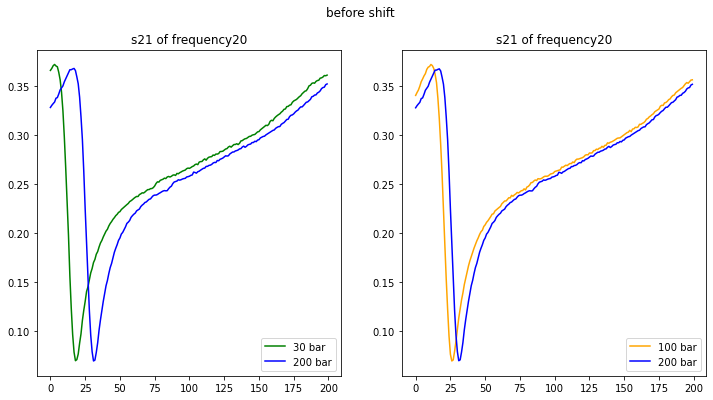

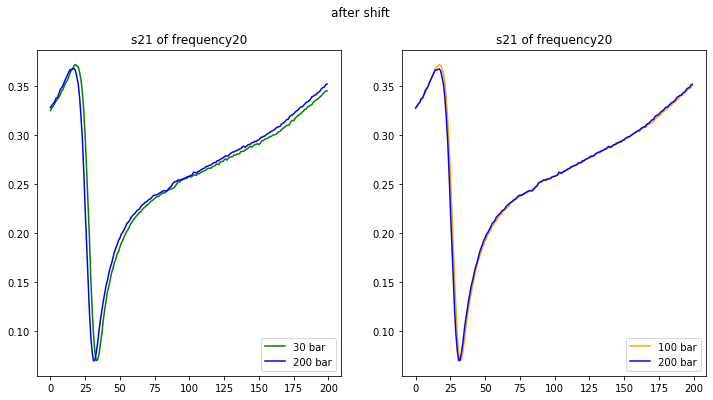

In [29]:
plot_compare_s21(s21_30,s21_100,s21_200,shifts1,shifts2,shifts1_,shifts2_,interval=1,points=200)

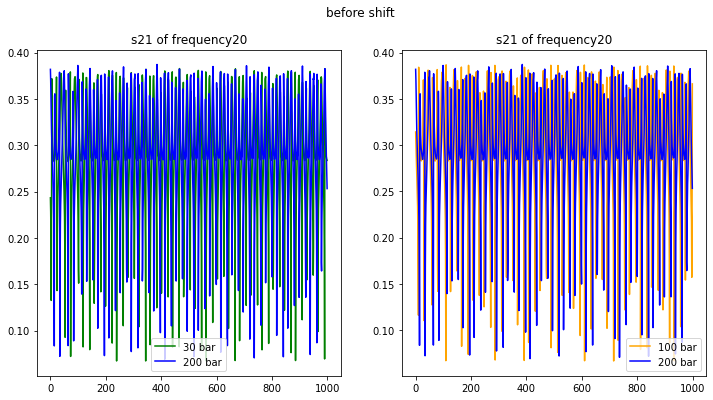

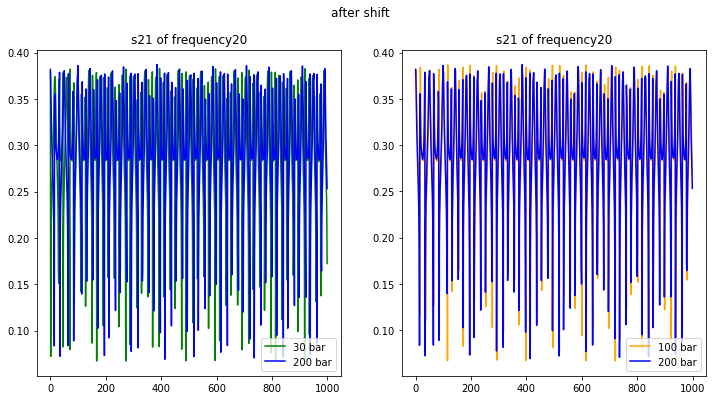

In [30]:
plot_compare_s21(s21_30,s21_100,s21_200,shifts1,shifts2,shifts1_,shifts2_,8,1000)

#### Manual alignment of [8000,9000]

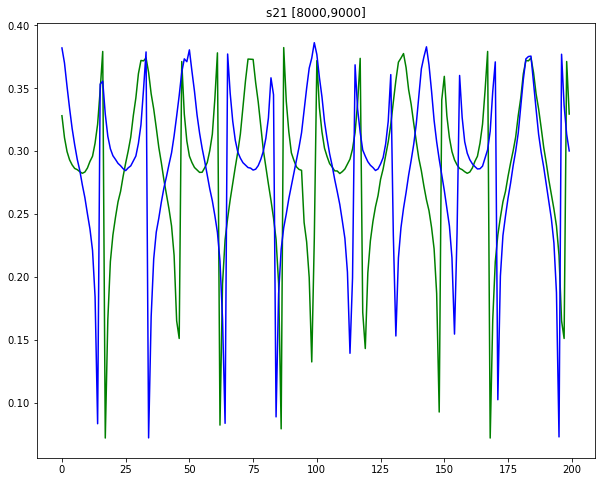

In [31]:
i = 8
points = 200
first = i*1000
last = first+points
shift_30_ = shifts_30_200[i]
shift_100_ = shifts_100_200[i]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('s21 [8000,9000]')
ax.plot(abs(s21_30[first+shift_30_:last+shift_30_,freq]),'green')
# ax.plot(abs(s21_100[first+shift_100_:last+shift_100_,freq]),'orange')
ax.plot(abs(s21_200[first:last,freq]),'blue')

In [32]:
np.argmax(s21_30[first+shift_30_:last+shift_30_,freq])

17

In [33]:
np.argmax(s21_100[first+shift_100_:last+shift_100_,freq])

13

In [34]:
np.argmax(s21_200[first:last,freq])

34

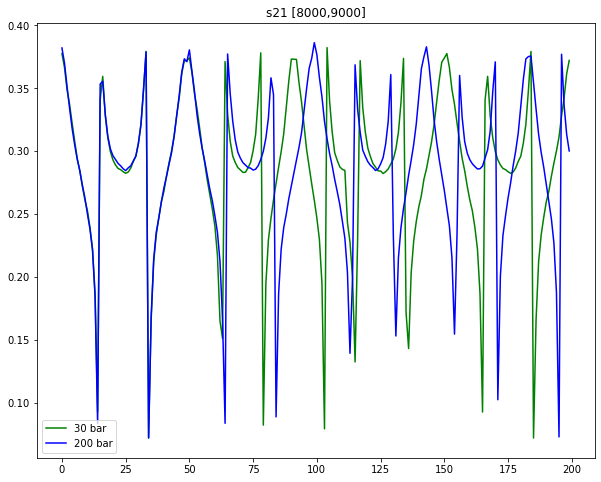

In [35]:
i = 8
points = 200
first = i*1000
last = first+points
shift_30_ = shifts_30_200[i]
shift_100_ = shifts_100_200[i]
shift_m_1 = -17
shift_m_2 = -21
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('s21 [8000,9000]')
ax.plot(abs(s21_30[first+shift_30_+shift_m_1:last+shift_30_+shift_m_1,freq]),'green',label='30 bar')
# ax.plot(abs(s21_100[first+shift_100_+shift_m_2:last+shift_100_+shift_m_2,freq]),'orange',label='100 bar')
ax.plot(abs(s21_200[first:last,freq]),'blue',label='200 bar')
ax.legend()

#### extract only perfect aligned data for evaluation

In [36]:
interval = 1
points = 1000
first = interval * 1000
last = first + points

_s21_30 = s21_30_shifted[first:last,:]
_s21_100 = s21_100_shifted[first:last,:]
_s21_200 = s21_200_shifted[first:last,:]
_s21_30.shape

(1000, 121)

C:\Users\xin\anaconda3\envs\liebherr\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\xin\anaconda3\envs\liebherr\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\xin\anaconda3\envs\liebherr\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


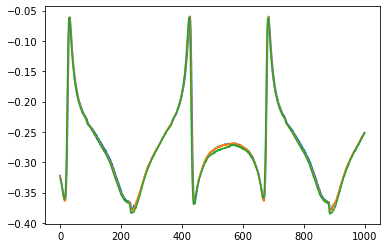

In [42]:
plt.plot(_s21_30[:,20])
plt.plot(_s21_100[:,20])
plt.plot(_s21_200[:,20])

C:\Users\xin\anaconda3\envs\liebherr\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\xin\anaconda3\envs\liebherr\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\xin\anaconda3\envs\liebherr\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


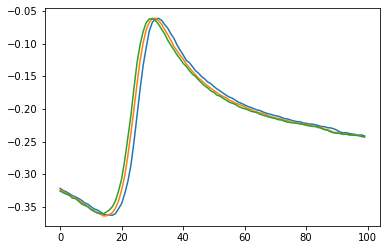

In [37]:
plt.plot(_s21_30[:100,20])
plt.plot(_s21_100[:100,20])
plt.plot(_s21_200[:100,20])

### Evaluation based on relative error

In [38]:
# result dictionary
d = {
    "abs":[np.mean(abs(_s21_30)),np.mean(abs(_s21_100)),np.mean(abs(_s21_200))],
}
d["mae"] = [abs(np.mean(abs(_s21_30 -_s21_200))),
            abs(np.mean(abs(_s21_100 -_s21_200)))
            ,0]
d["re"] = [d["mae"][0]/d["abs"][2],
           d["mae"][1]/d["abs"][2],
           0]
pd.DataFrame.from_dict(d, orient='index',
                       columns=['30bar', '100bar', '200bar'])

,30bar,100bar,200bar
abs,0.219043,0.218870,0.218944
mae,0.015428,0.009265,0.000000
re,0.070464,0.042317,0.000000


### Evaluation based on MAPE

In [39]:
# real and imag parts of a complex are seperated and even not adjacent!
# but that's enough for the calculation of mae and mape

dataset_p30 = []
for j in range (121):
    dataset_p30.append(_s21_30[:,j].real)
    dataset_p30.append(_s21_30[:,j].imag)
_s21_30_242 = np.array(dataset_p30).T

dataset_p100 = []
for j in range (121):
    dataset_p100.append(_s21_100[:,j].real)
    dataset_p100.append(_s21_100[:,j].imag)
_s21_100_242 = np.array(dataset_p100).T

dataset_p200 = []
for j in range (121):
    dataset_p200.append(_s21_200[:,j].real)
    dataset_p200.append(_s21_200[:,j].imag)
_s21_200_242 = np.array(dataset_p200).T


In [40]:
# Evaluation before autoencoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

_s21_200_242= _s21_200_242.flatten()
_s21_100_242= _s21_100_242.flatten()
_s21_30_242= _s21_30_242.flatten()

ind = np.where(np.logical_and(_s21_200_242>=-1e-7, _s21_200_242<=1e-7))[0]
_s21_200_242[ind] = 1e-7 # Prevent division by zero 

d2 = {
    "abs":[np.mean(abs(_s21_30)),np.mean(abs(_s21_100)),np.mean(abs(_s21_200))],
    
    "mae":[
        mean_absolute_error(_s21_200_242,_s21_30_242),
        mean_absolute_error(_s21_200_242,_s21_100_242),
        0
    ],
    
    "mape":[
        mean_absolute_percentage_error(_s21_200_242,_s21_30_242),
        mean_absolute_percentage_error(_s21_200_242,_s21_100_242),
        0
    ]
}

pd.DataFrame.from_dict(d2, orient='index',
                       columns=['30bar', '100bar', '200bar'])

,30bar,100bar,200bar
abs,0.219043,0.218870,0.218944
mae,0.009755,0.005877,0.000000
mape,9.398354,6.836782,0.000000


#### Conclusion

Relative Differences betwwen s21s in different pressure:

30 bar vs 200 bar: >9.40%

100 bar vs 200 bar: >6.84%
